# __ALTSCHOOL THIRD SEMESTER PROJECT__
#### PROJECT BY: Oladokun Sunday
#### ADMISSION NUMBER: 

# __PROJECT BRIEF__

#### __Project Title:__

House Prices Prediction

#### __Project Overview:__ 

In this capstone project, I applied my data science and machine learning skills to develop a predictive model for house prices. This project involved data cleaning, exploratory data analysis (EDA), feature engineering, model training, and evaluation. Using a real-world dataset, I built a model that accurately predicts house prices based on various features.

#### __Problem Statement:__

Predicting house prices accurately is a significant challenge in the real estate market due to the numerous factors influencing property values. Accurate predictions can greatly benefit buyers, sellers, real estate agents, and financial institutions by providing a reliable estimate of property values. This project aims to develop a robust machine learning model that can predict house prices based on various features of the houses.

#### __Project General Objective:__
    
The primary objective is to minimize the prediction error and ensure that the model generalizes well to new, unseen data, thus offering reliable and actionable insights in the real estate market.

#### __Project Specific Objectives:__
    
Aid potential buyers and sellers in making informed decisions.
Provide real estate agents with a tool to offer more accurate pricing advice.
Assist financial institutions in evaluating the value of properties for mortgage and investment purposes.


#### __Data Collection:__

The dataset used in this project, "Housing Sales: Factors Influencing Sale Prices" from Kaggle, includes multiple features such as the size of the house, the number of bedrooms and bathrooms, location, year built, and other structural and qualitative attributes. The goal is to leverage this dataset to train and validate a predictive model that provides precise house price estimations.

The dataset can be accessed here: https://www.kaggle.com/datasets/rohit265/housing-sales-factors-influencing-sale-prices

### __IMPORT NECESSARY LIBRARIES__

In [95]:
# Importing standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for data preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer

# Importing libraries for machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

# Importing libraries for model evaluation
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, precision_recall_curve

# Importing libraries for model interpretability
import shap
import lime
import lime.lime_tabular

# Importing libraries for API development and deployment
from flask import Flask, request, jsonify
import joblib

# Miscellaneous libraries
import warnings
warnings.filterwarnings('ignore')

# Display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### __IMPORT DATASET__

In [96]:
# Import the data
df = pd.read_csv(r"C:\Users\antho\OneDrive\Documents\GitHub\Project--Third-Semester-\housing.csv")

In [97]:
# View the first five rows in the dataset to confirm what I imported
df.head()

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
0,141,31770,OneFam,One_Story,Average,1960,Typical,1080,1656,0,1,0,3,1,2,-93.619754,42.054035,215000
1,80,11622,OneFam,One_Story,Above_Average,1961,Typical,882,896,0,1,0,2,1,0,-93.619756,42.053014,105000
2,81,14267,OneFam,One_Story,Above_Average,1958,Typical,1329,1329,0,1,1,3,1,0,-93.619387,42.052659,172000
3,93,11160,OneFam,One_Story,Average,1968,Typical,2110,2110,0,2,1,3,1,2,-93.617320,42.051245,244000
4,74,13830,OneFam,Two_Story,Average,1997,Typical,928,928,701,2,1,3,1,1,-93.638933,42.060899,189900


In [98]:
# Checking the size of the dataset
df.shape

(2413, 18)

### __GENERAL OVERVIEW OF THE DATASET__

In [99]:
# Check the first five rows
train_df.head()

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
765,85,10200,OneFam,One_Story,Average,2007,Typical,1578,1602,0,2,0,3,1,1,-93.684115,42.016468,293200
2387,54,13811,OneFam,One_Story,Above_Average,1987,Typical,1112,1137,0,2,0,2,1,1,-93.646099,41.999553,176000
2162,60,10800,OneFam,One_and_Half_Fin,Very_Good,1936,Typical,796,1096,370,2,0,3,1,1,-93.613899,42.034761,170000
1833,79,9245,OneFam,Two_Story,Average,2006,Typical,939,939,858,2,1,3,1,0,-93.684137,42.014823,213500
1814,120,10356,OneFam,One_Story,Above_Average,1975,Typical,969,969,0,1,1,3,1,0,-93.684354,42.021025,122000


#### **How large is the dataset that we are working with?**

In [100]:
# Check the size of the dataset
data_size = train_df.shape

print(f'The training set has {data_size[0]} rows (observations) and {data_size[-1]} columns (features)')

The training set has 1930 rows (observations) and 18 columns (features)


#### **What are the different features contained in our dataset?**

In [101]:
# Check the different features(columns) and their respective descriptions
columns = list(train_df.columns)
print(columns)

['Lot_Frontage', 'Lot_Area', 'Bldg_Type', 'House_Style', 'Overall_Cond', 'Year_Built', 'Exter_Cond', 'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Fireplaces', 'Longitude', 'Latitude', 'Sale_Price']


This is a brief description of all the features contained in our dataset

Lot_Frontage: Linear feet of street connected to the property.

Lot_Area: Lot size in square feet.

Bldg_Type: Type of building (e.g., single-family, multi-family).

House_Style: Style of the house (e.g., ranch, two-story).

Overall_Cond: Overall condition rating of the house.

Year_Built: Year the house was built.

Exter_Cond: Exterior condition rating of the house.

Total_Bsmt_SF: Total square feet of basement area.

First_Flr_SF: First-floor square feet.

Second_Flr_SF: Second-floor square feet.

Full_Bath: Number of full bathrooms.

Half_Bath: Number of half bathrooms.

Bedroom_AbvGr: Number of bedrooms above ground.

Kitchen_AbvGr: Number of kitchens above ground.

Fireplaces: Number of fireplaces.

Longitude: Longitude coordinates of the property location.

Latitude: Latitude coordinates of the property location.

Sale_Price: Sale price of the property.

#### **Statistical summary of our data**

In [102]:
# Check the general overview of our data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1930 entries, 765 to 1213
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Lot_Frontage   1930 non-null   int64  
 1   Lot_Area       1930 non-null   int64  
 2   Bldg_Type      1930 non-null   object 
 3   House_Style    1930 non-null   object 
 4   Overall_Cond   1930 non-null   object 
 5   Year_Built     1930 non-null   int64  
 6   Exter_Cond     1930 non-null   object 
 7   Total_Bsmt_SF  1930 non-null   int64  
 8   First_Flr_SF   1930 non-null   int64  
 9   Second_Flr_SF  1930 non-null   int64  
 10  Full_Bath      1930 non-null   int64  
 11  Half_Bath      1930 non-null   int64  
 12  Bedroom_AbvGr  1930 non-null   int64  
 13  Kitchen_AbvGr  1930 non-null   int64  
 14  Fireplaces     1930 non-null   int64  
 15  Longitude      1930 non-null   float64
 16  Latitude       1930 non-null   float64
 17  Sale_Price     1930 non-null   int64  
dtypes: float64(

In [103]:
# Check the statistical summary of our data- numerical
train_df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Lot_Frontage,1930.0,54.965285,33.821358,0.000000,35.000000,60.000000,76.000000,313.000000
Lot_Area,1930.0,10050.706218,8519.529871,1470.000000,7250.500000,9362.000000,11424.500000,215245.000000
Year_Built,1930.0,1970.115026,29.108567,1872.000000,1954.000000,1972.000000,1998.000000,2010.000000
Total_Bsmt_SF,1930.0,1027.575648,414.946084,0.000000,784.000000,972.000000,1251.750000,3206.000000
First_Flr_SF,1930.0,1137.199482,374.324302,334.000000,867.250000,1057.000000,1352.250000,3820.000000
Second_Flr_SF,1930.0,335.330570,423.726725,0.000000,0.000000,0.000000,696.500000,1872.000000
Full_Bath,1930.0,1.545596,0.543822,0.000000,1.000000,2.000000,2.000000,4.000000
Half_Bath,1930.0,0.376684,0.498391,0.000000,0.000000,0.000000,1.000000,2.000000
Bedroom_AbvGr,1930.0,2.855959,0.813939,0.000000,2.000000,3.000000,3.000000,6.000000
Kitchen_AbvGr,1930.0,1.039896,0.198397,0.000000,1.000000,1.000000,1.000000,2.000000


In [104]:
# Check the statistical summary of our data- Categorical
train_df.describe(include= "object").T

,count,unique,top,freq
Bldg_Type,1930,5,OneFam,1585
House_Style,1930,8,One_Story,958
Overall_Cond,1930,9,Average,1040
Exter_Cond,1930,5,Typical,1675


### **DATA CLEANING**

Peace

Review data source and collection methods, use that to determine the features necessary for our machine learning project

Identify and handle missing data.

Identify and remove duplicate records.

Detect and handle outliers



Sunday

Correct typographical errors and inconsistencies

Ensure consistent formats (dates, time, units, labels)

Convert data types to appropriate formats

Addressing Data Quality Issues

Handling Categorical Variables: Clean text (remove special characters, punctuation, stop words)

#### **Correcting typographical errors and inconsistencies**

In [105]:
# View the first 5 rows of our data
train_df.head()

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
765,85,10200,OneFam,One_Story,Average,2007,Typical,1578,1602,0,2,0,3,1,1,-93.684115,42.016468,293200
2387,54,13811,OneFam,One_Story,Above_Average,1987,Typical,1112,1137,0,2,0,2,1,1,-93.646099,41.999553,176000
2162,60,10800,OneFam,One_and_Half_Fin,Very_Good,1936,Typical,796,1096,370,2,0,3,1,1,-93.613899,42.034761,170000
1833,79,9245,OneFam,Two_Story,Average,2006,Typical,939,939,858,2,1,3,1,0,-93.684137,42.014823,213500
1814,120,10356,OneFam,One_Story,Above_Average,1975,Typical,969,969,0,1,1,3,1,0,-93.684354,42.021025,122000


In [106]:
# Extract categorical features as a list
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Extract numerical features as a list
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)

Categorical features: ['Bldg_Type', 'House_Style', 'Overall_Cond', 'Exter_Cond']
Numerical features: ['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Fireplaces', 'Longitude', 'Latitude', 'Sale_Price']


For the object type features which are 4 in number, I will be inspecting them one after the other to ensure that they are all correctly filled without unnecessary characters and figures.

In [107]:
# Subset the object type features for inspection
object_data_df = train_df[categorical_features]
object_data_df.head()

,Bldg_Type,House_Style,Overall_Cond,Exter_Cond
765,OneFam,One_Story,Average,Typical
2387,OneFam,One_Story,Above_Average,Typical
2162,OneFam,One_and_Half_Fin,Very_Good,Typical
1833,OneFam,Two_Story,Average,Typical
1814,OneFam,One_Story,Above_Average,Typical


In [108]:
# View the unique entries in each feature
for feature in object_data_df.columns:
    unique_entries = object_data_df[feature].unique()
    print(f'The unique entries in {feature} are {unique_entries}')

The unique entries in Bldg_Type are ['OneFam' 'Twnhs' 'Duplex' 'TwnhsE' 'TwoFmCon']
The unique entries in House_Style are ['One_Story' 'One_and_Half_Fin' 'Two_Story' 'SLvl' 'SFoyer'
 'Two_and_Half_Fin' 'One_and_Half_Unf' 'Two_and_Half_Unf']
The unique entries in Overall_Cond are ['Average' 'Above_Average' 'Very_Good' 'Fair' 'Good' 'Excellent'
 'Below_Average' 'Poor' 'Very_Poor']
The unique entries in Exter_Cond are ['Typical' 'Good' 'Fair' 'Poor' 'Excellent']


In [109]:
# Subset the numerical type features for inspection
numerical_data_df = train_df[numerical_features]
numerical_data_df.head()

,Lot_Frontage,Lot_Area,Year_Built,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
765,85,10200,2007,1578,1602,0,2,0,3,1,1,-93.684115,42.016468,293200
2387,54,13811,1987,1112,1137,0,2,0,2,1,1,-93.646099,41.999553,176000
2162,60,10800,1936,796,1096,370,2,0,3,1,1,-93.613899,42.034761,170000
1833,79,9245,2006,939,939,858,2,1,3,1,0,-93.684137,42.014823,213500
1814,120,10356,1975,969,969,0,1,1,3,1,0,-93.684354,42.021025,122000


In [110]:
# View the unique entries in each feature
for feature in numerical_data_df.columns:
    unique_entries = numerical_data_df[feature].unique()
    print(f'The unique entries in {feature} are {unique_entries}')

The unique entries in Lot_Frontage are [ 85  54  60  79 120   0  24  71  80  90  48  62  74  61  59  70  75  36
  37  52  56  76  91  65  64  69  53  51  63  67  68  50  35  21  72  55
 101  87  58  49  82  86  45  44 110  43  81  34  92  66  38  83  30  84
  57  73 100  78  98  95  26  99  41 105 106 150 115 155  42  94 116 103
  32  39  88  96 102 114 122 118  89  77  93 121 108  31 130  40 137 125
 195 112 128 149 129  47 123 109  28  33 107 140  46 134 104 126  97 124
 174 141  25 131 119 135 200 313]
The unique entries in Lot_Area are [10200 13811 10800 ... 12352 10171 39104]
The unique entries in Year_Built are [2007 1987 1936 2006 1975 1910 1977 1961 2005 1923 1920 1967 1969 2003
 1964 1925 1974 1934 1965 1945 1976 1999 1970 1958 1932 1935 1950 1968
 1930 1940 1995 1954 1997 1993 1994 1979 1922 1915 1926 2002 1946 2004
 1963 1996 1966 1875 1931 1998 1939 1924 1941 1952 1937 1972 1951 1914
 1962 1938 1992 1955 1928 1916 1921 1989 2008 1890 1949 2000 1978 1960
 1927 1908 1986 1959

From the data description above for the various object type features in the dataset, I carefully studied the data description of the data on Kaggle and fortunately, everything is in order. There is no need to strip, split of even adjust any of the entries.

#### **Ensure consistent formats (dates, time, units, labels)**

This section will be taking a look at the entries for each feature to ensure that they are entered in using the right metrics and units, especially date and time features, they mostly come as object or integer data types sometimes so there is usually a need to convert their data types and also ensure they are entered in the right format. For the units and lables, I will be using the data description file for inspection.

In [111]:
# Inspecting Year Built- the only feature that has to do with time
df[['Year_Built']]

,Year_Built
0,1960
1,1961
2,1958
3,1968
4,1997
5,1998
6,2001
7,1992
8,1995
9,1999


As we can see from the above, the only date time feature (Year Built) is an integer type. Now I understand that it might not really be necessary to convert it depending on the kind of analysis that needs to be carried out and I won't be converting this feature to datetime because of the following:

1. The conversion is not going to be effective as pandas will only convert them to 1st of January of each and we don't have further details to ensure this does not happen

2. To determine the age of each of the houses if the need arises, I can easily use a loop to subtract each year from 2024 and then append them to the dataset

Lastly, the data description file was studied as well for each of our features and they are all consistent when it comes to labels, units of measurements and standards

#### **Addressing Data Quality Issues**

Addressing data quality issues such as handling of missing values, duplicate records and outliers

In [112]:
# Handle duplicate records

In [113]:
# Handle missing values

In [114]:
# Handling outliers

### __SPLIT THE DATASET INTO TRAINING TEST DATASET__

Before I dive into really exploring my data, its important to split into train and test datasets for the following reasons:

Prevents data leakage: By splitting before EDA, training set is isolated from the test set, preventing any information transfer.

   
Mimics real-world scenario: this will stimulate the model to perform on unseen data

In [115]:
# Set the random seed for reproducibility
random_seed = 42

# Define the fraction of data to be used for the training set
train_fraction = 0.8

# Sample the training data
train_df = df.sample(frac=train_fraction, random_state=random_seed)

# Get the test data by dropping the training indices
test_df = df.drop(train_df.index)

In [116]:
# View the training set
train_df.head()

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
765,85,10200,OneFam,One_Story,Average,2007,Typical,1578,1602,0,2,0,3,1,1,-93.684115,42.016468,293200
2387,54,13811,OneFam,One_Story,Above_Average,1987,Typical,1112,1137,0,2,0,2,1,1,-93.646099,41.999553,176000
2162,60,10800,OneFam,One_and_Half_Fin,Very_Good,1936,Typical,796,1096,370,2,0,3,1,1,-93.613899,42.034761,170000
1833,79,9245,OneFam,Two_Story,Average,2006,Typical,939,939,858,2,1,3,1,0,-93.684137,42.014823,213500
1814,120,10356,OneFam,One_Story,Above_Average,1975,Typical,969,969,0,1,1,3,1,0,-93.684354,42.021025,122000


In [117]:
# Size of the training set
train_df.shape

(1930, 18)

In [118]:
# View the test set
test_df.head()

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
1,80,11622,OneFam,One_Story,Above_Average,1961,Typical,882,896,0,1,0,2,1,0,-93.619756,42.053014,105000
4,74,13830,OneFam,Two_Story,Average,1997,Typical,928,928,701,2,1,3,1,1,-93.638933,42.060899,189900
11,0,7980,OneFam,One_Story,Good,1992,Good,1168,1187,0,2,0,3,1,0,-93.635951,42.057419,185000
16,152,12134,OneFam,One_and_Half_Fin,Good,1988,Typical,559,1080,672,2,0,4,1,0,-93.623595,42.060351,164000
19,105,11751,OneFam,One_Story,Above_Average,1977,Typical,1844,1844,0,2,0,3,1,1,-93.633962,42.050346,190000


In [119]:
# Size of the test set
test_df.shape

(483, 18)

### __EXPLORATORY DATA ANALYSIS__

Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

EDA helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a provides a better understanding of data set variables and the relationships between them. It can also help determine if the statistical techniques you are considering for data analysis are appropriate. Originally developed by American mathematician John Tukey in the 1970s, EDA techniques continue to be a widely used method in the data discovery process today.

The dataset has been split into training and test datasets but we will focus on the training dataset for the following reasons:

1. **Understanding Patterns**: The training dataset is what you'll use to train your model, so understanding its patterns, distributions, and relationships is crucial.

2. **Avoiding Data Leakage**: Performing EDA on the test set can lead to data leakage, where information from the test set influences the model training process, resulting in overly optimistic performance estimates.

3. **Model Validation**: The test set should be kept unseen until final model evaluation to provide an unbiased estimate of the model's performance.

The EDA will be carried out as follows to have a comprehensive overview of our dataset:
    
1. Non-Graphical Univariate Analysis
2. Graphical Univariate Analysis
3. Non-Graphical Multivariate Analysis
4. Graphical Multivariate Analysis

#### __Non-Graphical Univariate Analysis__

In [129]:
# Frequency distribution for categorical features
for feature in categorical_features:
    print(f"Frequency distribution for {feature}:\n{train_df[feature].value_counts()}\n")
    print(f"Proportions for {feature}:\n{train_df[feature].value_counts(normalize=True)}\n")
    print(f"Unique values for {feature}: {train_df[feature].unique()}\n")

Frequency distribution for Bldg_Type:
Bldg_Type
OneFam      1585
TwnhsE       155
Twnhs         85
Duplex        64
TwoFmCon      41
Name: count, dtype: int64

Proportions for Bldg_Type:
Bldg_Type
OneFam      0.821244
TwnhsE      0.080311
Twnhs       0.044041
Duplex      0.033161
TwoFmCon    0.021244
Name: proportion, dtype: float64

Unique values for Bldg_Type: ['OneFam' 'Twnhs' 'Duplex' 'TwnhsE' 'TwoFmCon']

Frequency distribution for House_Style:
House_Style
One_Story           958
Two_Story           576
One_and_Half_Fin    209
SLvl                 95
SFoyer               54
Two_and_Half_Unf     20
One_and_Half_Unf     14
Two_and_Half_Fin      4
Name: count, dtype: int64

Proportions for House_Style:
House_Style
One_Story           0.496373
Two_Story           0.298446
One_and_Half_Fin    0.108290
SLvl                0.049223
SFoyer              0.027979
Two_and_Half_Unf    0.010363
One_and_Half_Unf    0.007254
Two_and_Half_Fin    0.002073
Name: proportion, dtype: float64

Unique v

- Bldg_Type:

    OneFam is the most common building type, comprising 82.12% of the dataset with 1,585 occurrences.

    TwnhsE follows at 8.03% with 155 instances.

    Twnhs and Duplex represent 4.40% and 3.32% respectively, while TwoFmCon is the least common at 2.12%.

- House_Style:

    One_Story is the most prevalent house style at 49.64% with 958 occurrences.

    Two_Story is the second most common, making up 29.84% with 576 instances.

    One_and_Half_Fin is at 10.83%, while the other styles are less frequent, with Two_and_Half_Fin being the rarest at 0.21%.

- Overall_Cond:

    Average condition is most frequent, appearing in 53.89% of the records.

    Above_Average and Good follow at 19.07% and 15.18% respectively.

    Very_Good accounts for 5.18%, while Poor and Very_Poor are rare, each below 0.2%.

- Exter_Cond:

    Typical condition is dominant, representing 86.79% of the dataset with 1,675 occurrences.

    Good is the next most frequent at 10.47%.
    
    Fair and Excellent are less common, with Poor being extremely rare at just 0.05%.

In [127]:
# Descriptive statistics for numerical features
print(train_df[numerical_features].describe())

       Lot_Frontage       Lot_Area   Year_Built  Total_Bsmt_SF  First_Flr_SF  \
count   1930.000000    1930.000000  1930.000000    1930.000000   1930.000000   
mean      54.965285   10050.706218  1970.115026    1027.575648   1137.199482   
std       33.821358    8519.529871    29.108567     414.946084    374.324302   
min        0.000000    1470.000000  1872.000000       0.000000    334.000000   
25%       35.000000    7250.500000  1954.000000     784.000000    867.250000   
50%       60.000000    9362.000000  1972.000000     972.000000   1057.000000   
75%       76.000000   11424.500000  1998.000000    1251.750000   1352.250000   
max      313.000000  215245.000000  2010.000000    3206.000000   3820.000000   

       Second_Flr_SF    Full_Bath    Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  \
count    1930.000000  1930.000000  1930.000000    1930.000000    1930.000000   
mean      335.330570     1.545596     0.376684       2.855959       1.039896   
std       423.726725     0.543822     0

### Summary of Descriptive Statistics:

- Lot_Frontage: The average lot frontage is approximately 55 feet, with values ranging from 0 to 313 feet. There is moderate variation in lot size, as indicated by a standard deviation of 33.82 feet.

- Lot_Area: The mean lot area is about 10,051 square feet, with a wide range from 1,470 to 215,245 square feet. The high standard deviation of 8,520 square feet suggests significant variability in lot sizes.

- Year_Built: Homes are generally built around 1970, with a range spanning from 1872 to 2010. The data shows that most homes are fairly recent, with the 25th percentile at 1954 and the 75th percentile at 1998.

- Total_Bsmt_SF: The average basement area is 1,028 square feet, with some variation (standard deviation of 415 square feet). Basement sizes range from 0 to 3,206 square feet.

- First_Flr_SF: The average first-floor area is 1,137 square feet, with a broad range from 334 to 3,820 square feet. This shows significant differences in first-floor sizes among homes.

- Second_Flr_SF: The mean second-floor area is 335 square feet, but many homes have no second floor, resulting in a large standard deviation of 424 square feet. Most homes either have no second floor or a small one.

- Full_Bath: On average, homes have about 1.55 full bathrooms, with values ranging from 0 to 4. The standard deviation of 0.54 reflects moderate variability in the number of bathrooms.

- Half_Bath: The average number of half bathrooms is 0.38, with most homes having none or one. The low standard deviation (0.50) indicates that the number of half bathrooms is fairly consistent.

- Bedroom_AbvGr: Homes typically have about 2.86 bedrooms above ground, ranging from 0 to 6. The data shows a moderate spread with a standard deviation of 0.81.

- Kitchen_AbvGr: On average, homes have just over one kitchen above ground. Most homes have one or none, with a low standard deviation (0.20).

- Fireplaces: Homes generally have about 0.61 fireplaces, with a range from 0 to 4. The standard deviation of 0.64 reflects a wide variation in the number of fireplaces.

- Longitude and Latitude: The longitude varies slightly around -93.64, and the latitude around 42.03, with very narrow ranges and low standard deviations, indicating the dataset is geographically concentrated.

- Sale_Price: The average sale price is $176,115, with significant variation (standard deviation of $72,495) and a range from $39,300 to $755,000. This suggests a wide disparity in property values.

In [128]:
# Checking for the distribution of our data
for feature in numerical_features:
    print(f"{feature} - Skewness: {train_df[feature].skew()}, Kurtosis: {train_df[feature].kurt()}\n")
    print(f"Unique values in {feature}: {train_df[feature].nunique()}\n")

Lot_Frontage - Skewness: -0.010874332548850906, Kurtosis: 1.4370117786433587

Unique values in Lot_Frontage: 116

Lot_Area - Skewness: 13.83340939856872, Kurtosis: 280.32867858348845

Unique values in Lot_Area: 1372

Year_Built - Skewness: -0.6174218718801794, Kurtosis: -0.33170204205987774

Unique values in Year_Built: 113

Total_Bsmt_SF - Skewness: 0.5208304471630972, Kurtosis: 1.8843798843632324

Unique values in Total_Bsmt_SF: 836

First_Flr_SF - Skewness: 1.1128277150650936, Kurtosis: 2.5608337141689184

Unique values in First_Flr_SF: 883

Second_Flr_SF - Skewness: 0.8506260894238284, Kurtosis: -0.4199882517033391

Unique values in Second_Flr_SF: 483

Full_Bath - Skewness: 0.22515784190196753, Kurtosis: -0.4672760136690086

Unique values in Full_Bath: 5

Half_Bath - Skewness: 0.6722933664480161, Kurtosis: -1.1456445950898546

Unique values in Half_Bath: 3

Bedroom_AbvGr - Skewness: 0.1886285063162228, Kurtosis: 1.5722853489035389

Unique values in Bedroom_AbvGr: 7

Kitchen_AbvGr -

### Lot_Frontage
**Skewness:** -0.081  
The distribution is nearly symmetric, indicating a balanced spread of values around the mean.  
**Kurtosis:** 1.166  
The distribution has slightly more pronounced tails than a normal distribution.  
**Unique Values:** 124  
There are 124 distinct values, suggesting considerable variety in lot frontage measurements.

### Lot_Area
**Skewness:** 13.394  
The distribution is highly positively skewed, with a long tail on the right. Most properties have smaller lot areas, while a few have very large ones.  
**Kurtosis:** 270.466  
The distribution features extremely heavy tails, indicating significant outliers.  
**Unique Values:** 1652  
There are 1652 distinct values, reflecting a broad range of lot area sizes.

### Year_Built
**Skewness:** -0.587  
The distribution is slightly negatively skewed, with a tail on the left. This suggests more houses were built in recent years.  
**Kurtosis:** -0.439  
The distribution is slightly platykurtic, showing fewer extreme values compared to a normal distribution.  
**Unique Values:** 114  
There are 114 distinct values, representing a variety of years when houses were constructed.

### Total_Bsmt_SF
**Skewness:** 0.456  
The distribution is moderately positively skewed, with more smaller basement sizes and some larger ones.  
**Kurtosis:** 1.716  
The distribution has heavier tails than normal, indicating the presence of some extreme values.  
**Unique Values:** 943  
There are 943 distinct values, indicating a wide range of basement sizes.

### First_Flr_SF
**Skewness:** 1.043  
The distribution is positively skewed, with more houses having smaller first-floor square footage.  
**Kurtosis:** 2.257  
The distribution has heavier tails than normal, with some larger outliers.  
**Unique Values:** 979  
There are 979 distinct values, showing a diverse range of first-floor sizes.

### Second_Flr_SF
**Skewness:** 0.804  
The distribution is moderately positively skewed, indicating more houses with smaller second-floor areas.  
**Kurtosis:** -0.559  
The distribution is slightly platykurtic, with fewer extreme values.  
**Unique Values:** 569  
There are 569 distinct values, reflecting moderate variety in second-floor sizes.

### Full_Bath
**Skewness:** 0.245  
The distribution is slightly positively skewed, with a small right tail.  
**Kurtosis:** -0.570  
The distribution is slightly platykurtic, showing fewer extreme values.  
**Unique Values:** 5  
There are 5 distinct values, representing the number of full bathrooms.

### Half_Bath
**Skewness:** 0.664  
The distribution is moderately positively skewed, with a right tail.  
**Kurtosis:** -1.163  
The distribution is platykurtic, indicating fewer extreme values.  
**Unique Values:** 3  
There are 3 distinct values, reflecting the number of half bathrooms.

### Bedroom_AbvGr
**Skewness:** 0.184  
The distribution is nearly symmetric, suggesting a balanced range of bedroom counts.  
**Kurtosis:** 1.472  
The distribution has slightly heavier tails than normal.  
**Unique Values:** 7  
There are 7 distinct values, indicating various counts of bedrooms above ground.

### Kitchen_AbvGr
**Skewness:** 4.682  
The distribution is highly positively skewed, with most houses having one kitchen and few having more.  
**Kurtosis:** 21.975  
The distribution features extremely heavy tails, with significant outliers.  
**Unique Values:** 4  
There are 4 distinct values, reflecting the number of kitchens above ground.

### Fireplaces
**Skewness:** 0.739  
The distribution is moderately positively skewed, with more houses having fewer fireplaces.  
**Kurtosis:** 0.138  
The distribution is close to normal, with slightly heavier tails.  
**Unique Values:** 5  
There are 5 distinct values, showing the range of fireplace counts in houses.

### Longitude
**Skewness:** -0.338  
The distribution is slightly negatively skewed, with a tail on the left.  
**Kurtosis:** -0.973  
The distribution is platykurtic, indicating fewer extreme values.  
**Unique Values:** 2309  
There are 2309 distinct values, reflecting precise location data.

### Latitude
**Skewness:** -0.508  
The distribution is moderately negatively skewed, with a left tail.  
**Kurtosis:** -0.083  
The distribution is nearly normal, with minor deviations.  
**Unique Values:** 2303  
There are 2303 distinct values, indicating detailed property location data.

### Sale_Price
**Skewness:** 1.745  
The distribution is highly positively skewed, with more lower sale prices and some very high ones.  
**Kurtosis:** 5.826  
The distribution features very heavy tails, highlighting significant outliers.  
**Unique Values:** 790  
There are 790 distinct values, indicating a broad range of sale prices.

#### __Graphical Univariate Analysis__

Histograms: Show distributions of continuous features.

Box Plots: Reveal the spread and outliers of continuous features.

Bar Plots: Display the frequency distribution of categorical features.

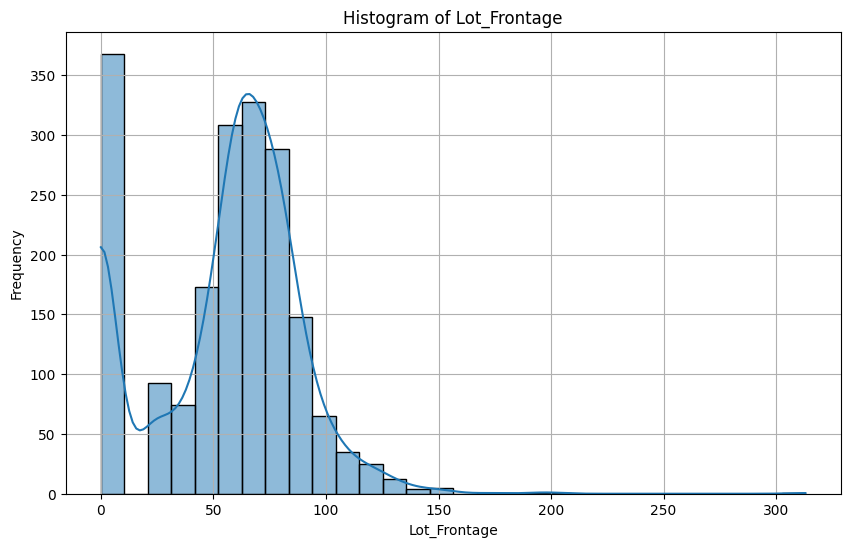

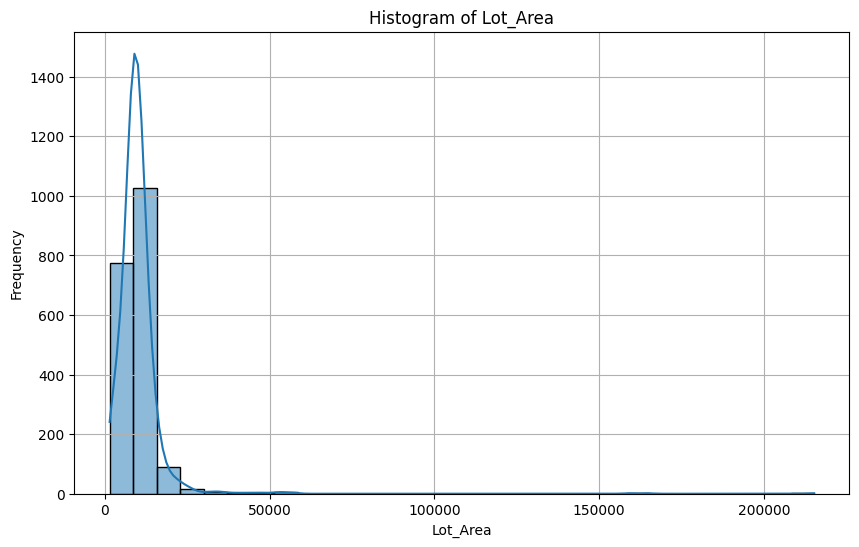

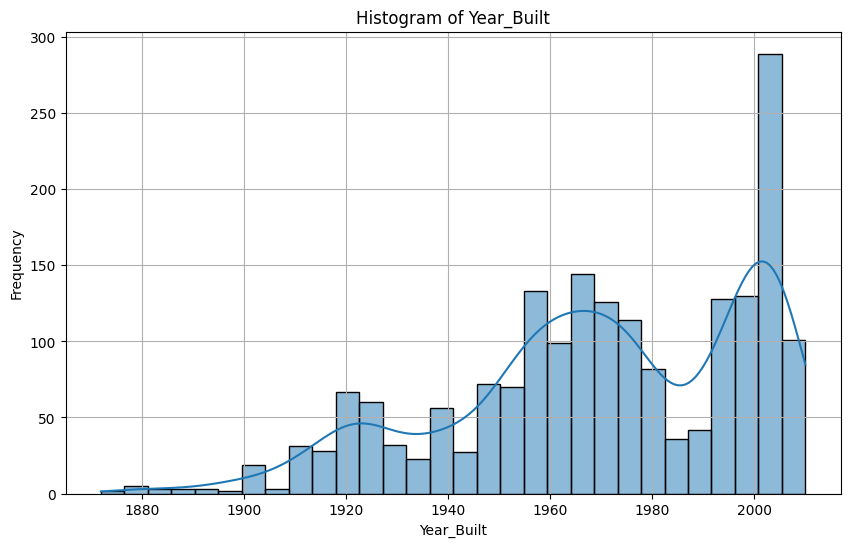

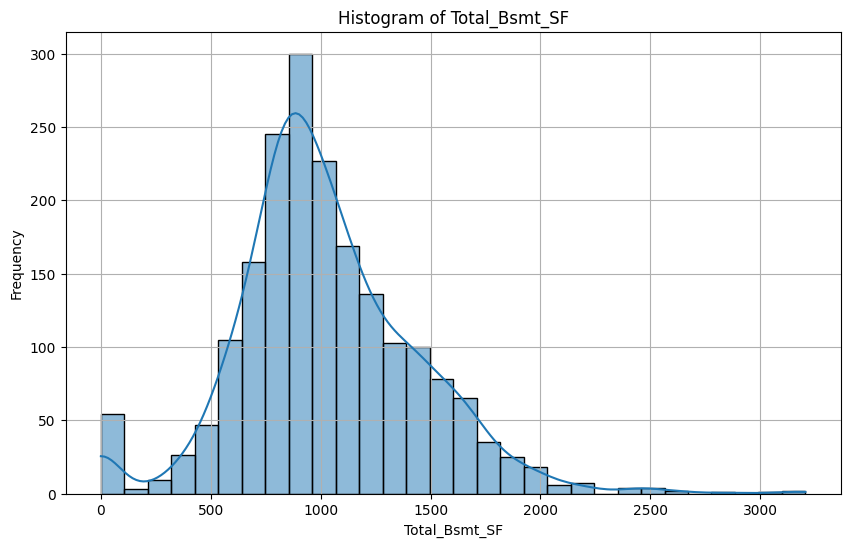

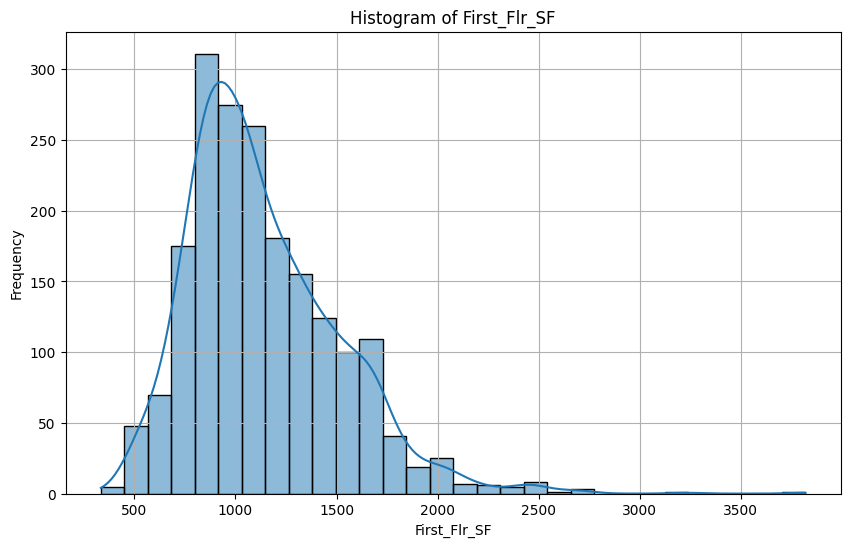

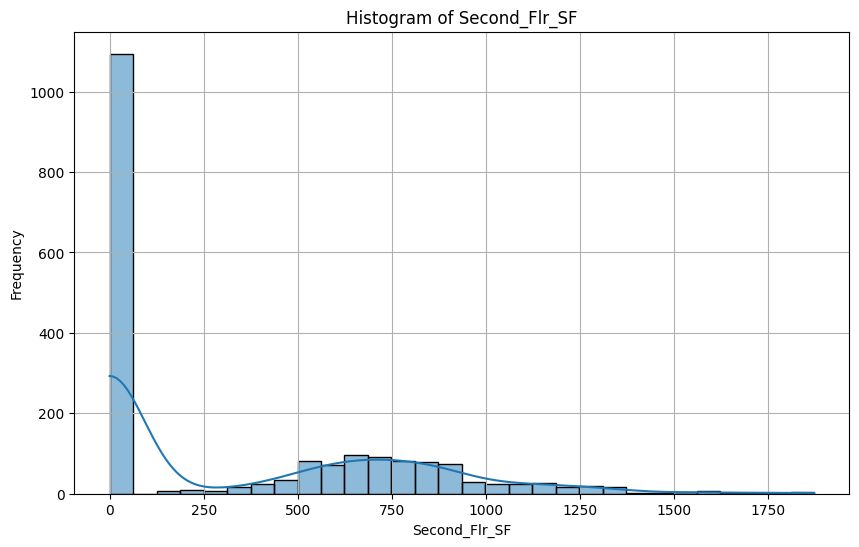

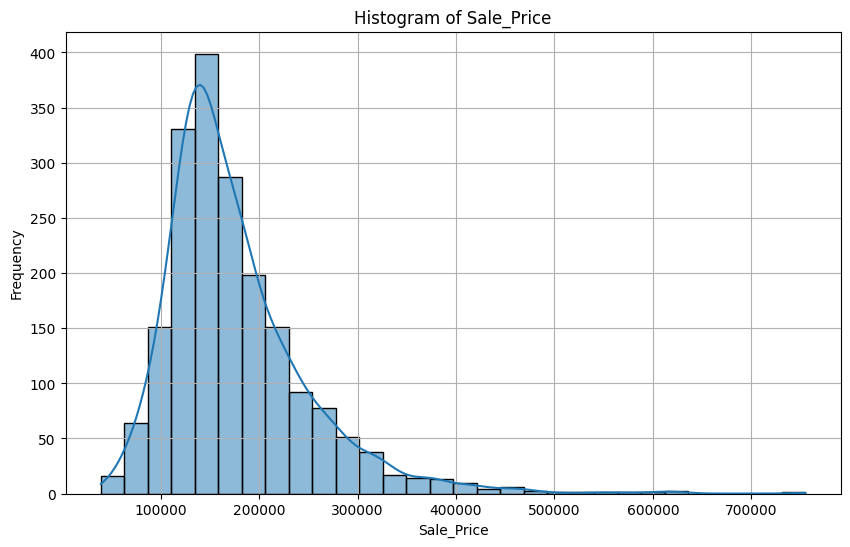

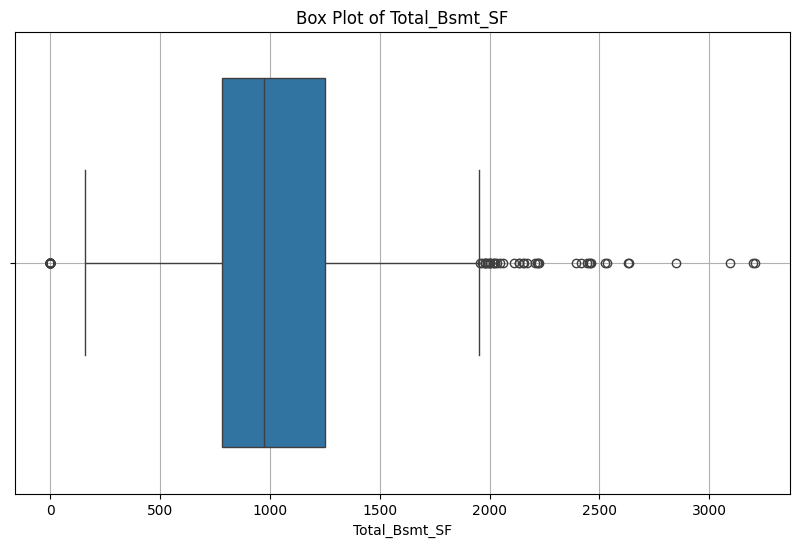

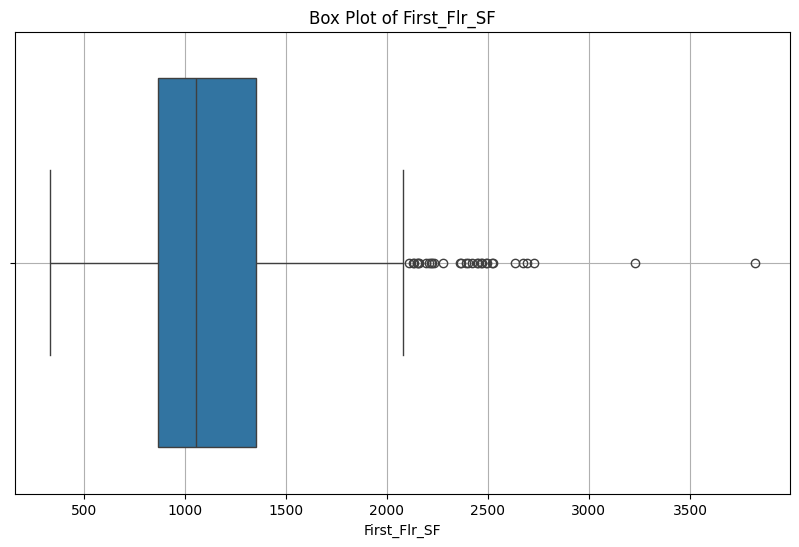

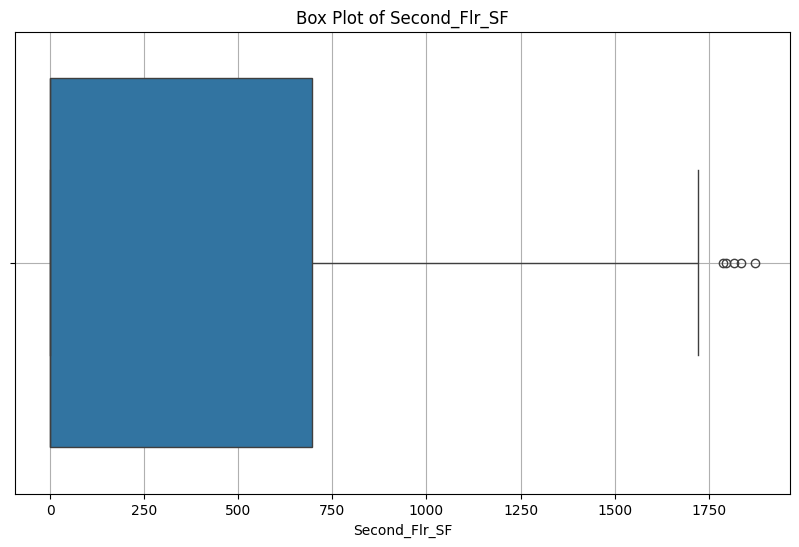

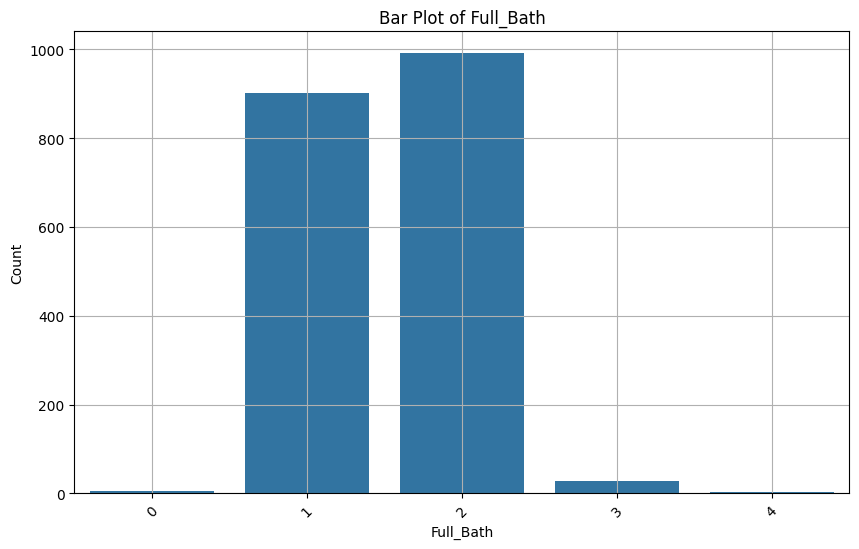

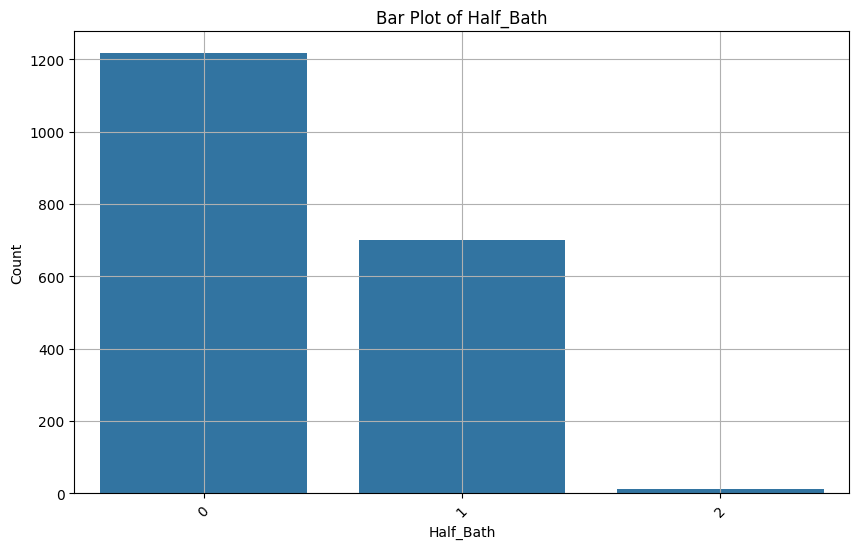

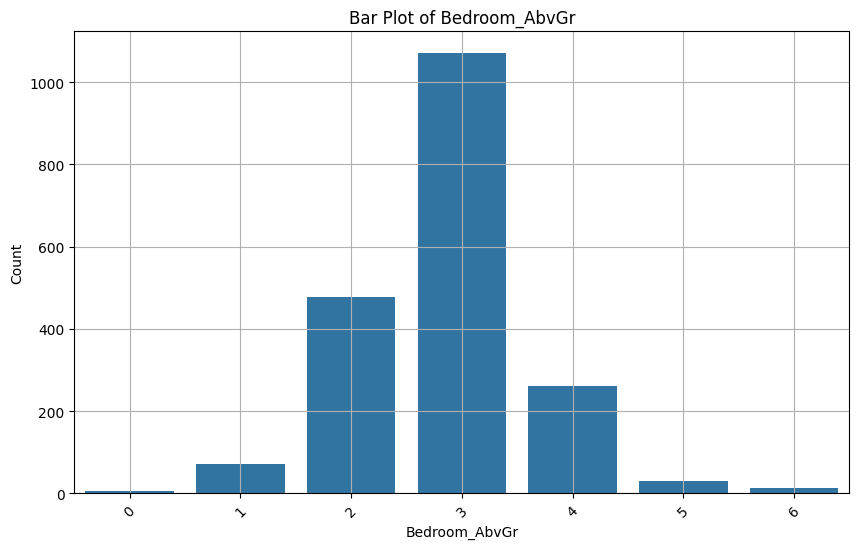

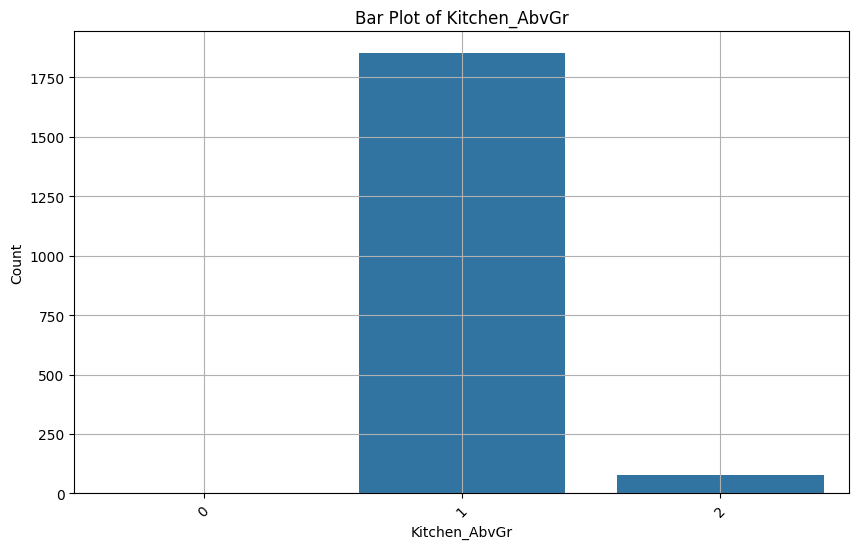

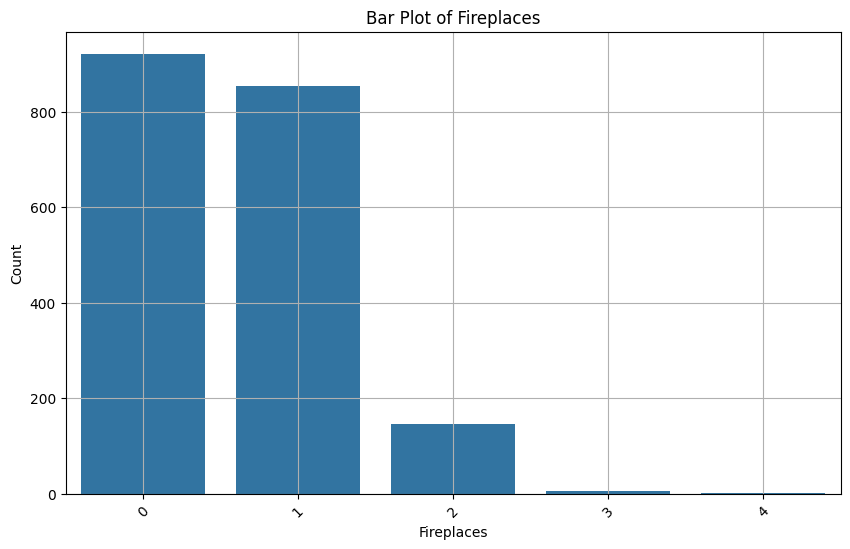

In [130]:
# Function to create histograms
def plot_histograms(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

# Function to create box plots
def plot_boxplots(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col}')
        plt.xlabel(col)
        plt.grid(True)
        plt.show()

# Function to create bar plots
def plot_barplots(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=df[col])
        plt.title(f'Bar Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

# Define the columns for graphical analysis
histogram_columns = ['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Sale_Price']
boxplot_columns = ['Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF']
barplot_columns = ['Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Fireplaces']

# Generate the plots
plot_histograms(train_df, histogram_columns)
plot_boxplots(train_df, boxplot_columns)
plot_barplots(train_df, barplot_columns)